# Mac-D Pizza Sales Report (2015)
#### By Valentine Ezenwanne

## About the Dataset

The dataset consits of four csv files that contain informations on the orders, order_details, pizza_types and pizza. The dataset contains features such as order_id, date, quantity, pizza type, price and others.

The purpose of these datasets is to analyze and present visually the sales performance for a fictious Mac-D Pizza Place for the year 2015.


## Features Description
The fearures in the tables include:
- order_id : Unique identifier for each order placed by a table

- date: Date the order was placed (entered into the system prior to cooking & serving)

- time: Time the order was placed (entered into the system prior to cooking & serving)

- order_details_id : Unique identifier for each pizza placed within each order (pizzas of the same type and size are kept in the same row, and the quantity increases)

- pizza_id: Unique identifier for each pizza (constituted by its type and size)

- quantity: Quantity ordered for each pizza of the same type and size

- size: Size of the pizza (Small, Medium, Large, X Large, or XX Large)

- price: Price of the pizza in USD

- pizza_type_id: Unique identifier for each pizza type

- name: Name of the pizza as shown in the menu

- category: Category that the pizza fall under in the menu (Classic, Chicken, Supreme, or Veggie)

- ingredients: Comma-delimited ingredients used in the pizza as shown in the menu (they all include Mozzarella Cheese, even if not specified; and they all include Tomato Sauce, unless another sauce is specified)


## Questions
These are some of the questions to be answered from the analysis

- What are the top KPI's 

    - How many customers did we have each day?
    
    - How many pizzas did we sell per day?
    
    - How many pizzas are typically in an order?
    
- Is the order impacted by trend?

- Which pizzas are the best and least sold ?

- which pizza are the top revenue generating pizza?

# Data Preparation

## Importing the Libraries

In [1]:
#import the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the datasets

In [2]:
#loading the 'order' data
orders = pd.read_csv('orders.csv')

In [3]:
#reading the first few lines of the order table
orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [4]:
#loading the 'order details' data
ord_details = pd.read_csv('order_details.csv')

In [5]:
#reading the first few lines of the order details table
ord_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [6]:
#loading the 'pizza types' data
pizza_types = pd.read_csv('pizza_types.csv', encoding='ISO-8859-1')

In [7]:
#reading the first few lines of the pizza type table
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [8]:
#loading the 'pizza' data
pizza = pd.read_csv('pizzas.csv')

In [9]:
#reading the first few lines of the pizza table
pizza.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


# Data Wrangling

## Assessing Orders table

In [10]:
#understanding the shape
orders.shape

(21350, 3)

In [11]:
#checking for duplicates
orders.duplicated().sum()

0

In [12]:
#checking for missing values
orders.isna().sum()

order_id    0
date        0
time        0
dtype: int64

In [13]:
#checking the datatypes
orders.dtypes

order_id     int64
date        object
time        object
dtype: object

- Change the datatype for date and time column to datetime

### Cleaning and Extraction

In [14]:
#change the datatype of date to datetime
orders['date'] = orders['date'].astype('datetime64')

In [15]:
#Extract months from date
orders['month'] = orders['date'].dt.month

In [16]:
#Extract month name
orders['month_name'] = orders['date'].dt.month_name()

In [17]:
#Extract quarter from date
orders['quarter'] = orders['date'].dt.quarter

In [18]:
#Change the datatype of hour to datetime and extract the hour
orders['hour'] = orders['time'].astype('datetime64').dt.hour

In [19]:
#displaying a few lines of the table
orders.head()

,order_id,date,time,month,month_name,quarter,hour
0,1,2015-01-01,11:38:36,1,January,1,11
1,2,2015-01-01,11:57:40,1,January,1,11
2,3,2015-01-01,12:12:28,1,January,1,12
3,4,2015-01-01,12:16:31,1,January,1,12
4,5,2015-01-01,12:21:30,1,January,1,12


## Assessing Order_details table

In [20]:
#checking missing values
ord_details.isna().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
dtype: int64

In [21]:
#checking for duplicates
ord_details.duplicated().sum()

0

In [22]:
#checking datatypes
ord_details.dtypes

order_details_id     int64
order_id             int64
pizza_id            object
quantity             int64
dtype: object

## Assessing Pizza_types table

In [23]:
#checking missing values
pizza_types.isna().sum()

pizza_type_id    0
name             0
category         0
ingredients      0
dtype: int64

In [24]:
#checking for duplicates
pizza_types.duplicated().sum()

0

In [25]:
#checking the datatypes
pizza_types.dtypes

pizza_type_id    object
name             object
category         object
ingredients      object
dtype: object

## Assessing Pizzas table

In [26]:
#checking datatypes
pizza.dtypes

pizza_id          object
pizza_type_id     object
size              object
price            float64
dtype: object

In [27]:
#checking for duplicates
pizza.duplicated().sum()

0

In [28]:
#checking missing values
pizza.isna().sum()

pizza_id         0
pizza_type_id    0
size             0
price            0
dtype: int64

# Combining the dataset 

## Merging the four CSV files

In [29]:
#merging the dataset for analysis
merged_data = orders.merge(ord_details, on='order_id').merge(pizza, on='pizza_id').merge(pizza_types, on='pizza_type_id')

In [30]:
#confirming the dataset have been merged
merged_data.head()

,order_id,date,time,month,month_name,quarter,hour,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,January,1,11,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,77,2015-01-02,12:22:46,1,January,1,12,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,146,2015-01-03,14:22:10,1,January,1,14,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,163,2015-01-03,16:54:54,1,January,1,16,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,247,2015-01-04,20:55:29,1,January,1,20,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"


### Dropping unnecessary column

In [31]:
#dropping unnecessary column 'ingredients'
merged_data.drop('ingredients', axis=1, inplace=True)

In [32]:
#confirming the column have been dropped
merged_data.columns

Index(['order_id', 'date', 'time', 'month', 'month_name', 'quarter', 'hour',
       'order_details_id', 'pizza_id', 'quantity', 'pizza_type_id', 'size',
       'price', 'name', 'category'],
      dtype='object')

### Creating a Revenue column

In [33]:
#creating a variable revenue
merged_data['revenue'] = merged_data['quantity'] * merged_data['price']

In [34]:
#confirming that revenue column has been created and its datatype its float
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          48620 non-null  int64         
 1   date              48620 non-null  datetime64[ns]
 2   time              48620 non-null  object        
 3   month             48620 non-null  int64         
 4   month_name        48620 non-null  object        
 5   quarter           48620 non-null  int64         
 6   hour              48620 non-null  int64         
 7   order_details_id  48620 non-null  int64         
 8   pizza_id          48620 non-null  object        
 9   quantity          48620 non-null  int64         
 10  pizza_type_id     48620 non-null  object        
 11  size              48620 non-null  object        
 12  price             48620 non-null  float64       
 13  name              48620 non-null  object        
 14  category          4862

# Calculating KPI's

### Total pizza types

In [35]:
# calculating total pizza types
total_pizza_types = merged_data['pizza_type_id'].nunique()
print('The total pizza types is: ', total_pizza_types)

The total pizza types is:  32


### Total business days

In [36]:
# calculating total business days
total_days = merged_data['date'].nunique()
print('The total business day is: ', total_days)

The total business day is:  358


### Total Customers

In [37]:
# calculating total unique customers
total_customers = merged_data['order_id'].nunique()
print('The total customers is: ', total_customers)

The total customers is:  21350


### Average Daily Customers

In [41]:
# calculating the average daily customers
avg_daily_customers = int(total_customers/total_days)
print('The average daily customers is: ', avg_daily_customers)

The average daily customers is:  59


### Total Orders

In [42]:
# calculating total orders
total_orders = merged_data['order_id'].count()
print('The total orders is: ', total_orders)

The total orders is:  48620


### Average daily orders

In [43]:
# calculating average daily order
avg_daily_orders = int(total_orders/total_days)
print('The average daily order is: ', avg_daily_orders)

The average daily order is:  135


### Total Quantity Sold

In [44]:
# calculating quantity sold
total_qty_sold = merged_data['quantity'].sum()
print('The total quantity sold is: ', total_qty_sold)

The total quantity sold is:  49574


### Average quantity sold per day

In [45]:
# calculating average quantity sold per day
avg_qty_sold_per_day = int(total_qty_sold/total_days)
print('The average quantity sold perday is: ',avg_qty_sold_per_day)

The average quantity sold perday is:  138


### Average pizza sold per order

In [46]:
# calculating average pizza sold per order
avg_pizza_sold_per_order = (total_qty_sold/total_orders).round(1)
print('The average pizza sold per order is: ',avg_pizza_sold_per_order)

The average pizza sold per order is:  1.0


### Total Revenue

In [47]:
# calculating total revenue generated
total_revenue = merged_data['revenue'].sum()
print('The total revenue is: ', total_revenue)

The total revenue is:  817860.05


### Average Order Value

In [48]:
# calculating average order value
avg_order_value = (total_revenue/total_orders).round(2)
print('The average order value is: ',  '$',avg_order_value)

The average order value is:  $ 16.82


# Order Analysis

## Hourly Orders

In [49]:
# calculating the total orders by hour
hourly_orders = merged_data.groupby(['hour'], as_index=False).agg(total_orders=('order_id', 'count'))
hourly_orders['hour'] = hourly_orders['hour'].astype('category')    #converting the datatype to category
hourly_orders

,hour,total_orders
0,9,4
1,10,17
2,11,2672
3,12,6543
4,13,6203
5,14,3521
6,15,3170
7,16,4185
8,17,5143
9,18,5359


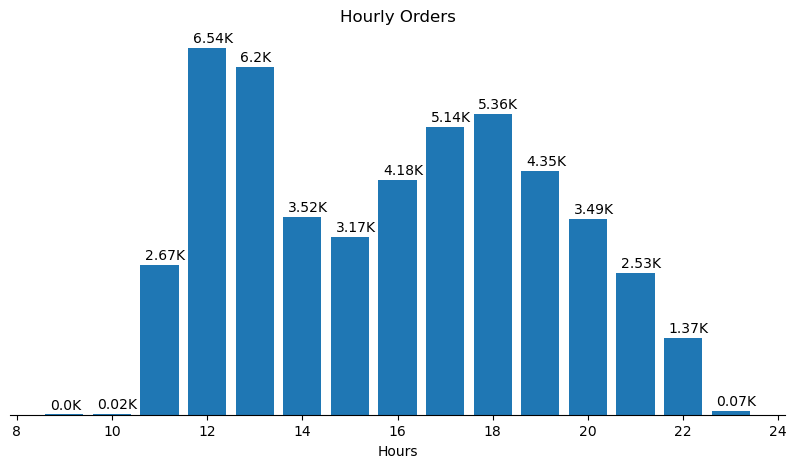

In [50]:
#plotting a barchart of the hourly orders

fig, ax = plt.subplots(figsize=[10,5])
ax.bar(data=hourly_orders, x='hour', height='total_orders')

ax.set_title('Hourly Orders')
ax.set_xlabel('Hours')
ax.set_ylabel('total orders')
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.yaxis.set_visible(False)

for index, value in enumerate(hourly_orders['total_orders'].values):
    ax.text(index+8.7, value+100, str((value/1000).round(2))+'K')

plt.show()

- The graph shows the hourly distribution of orders: The top three hours by orders are 12pm, 1pm and 6pm. 
- The time 12pm has the highest order of about **6543** orders, followed by 1pm (**6203** orders) and then 6pm has an order of **5359**.

## Peak Hour Orders  

In [51]:
# creating the percentage hourly orders column
hourly_orders['%Order'] = ((hourly_orders['total_orders'] / total_orders)*100).round(2)

In [52]:
#create a peak order hour dataframe
peak_order_hour = hourly_orders[['hour', '%Order']]

#Creating the top 5 peak hour percentage order dataframe
peak_hour = peak_order_hour.sort_values('%Order', ascending=False).head(5).reset_index()
peak_hour.drop('index', axis=1, inplace=True)
peak_hour

,hour,%Order
0,12,13.46
1,13,12.76
2,18,11.02
3,17,10.58
4,19,8.95


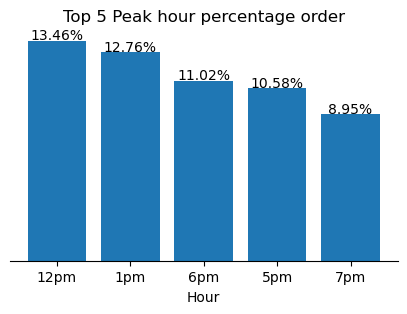

In [53]:
#plotting a barchart of the top 5 peak hour orders

fig, ax = plt.subplots(figsize=[5,3])
xx = peak_hour['hour'].astype('str')
ax.bar(x=xx, height=peak_hour['%Order'])
ax.set_title('Top 5 Peak hour percentage order')
ax.set_xlabel('Hour')
ax.set_ylabel('% Order')
for index, value in enumerate(peak_hour['%Order'].values):
    ax.annotate(str(value)+'%', xy=(index, value+0.3), ha='center', va='center')
ax.yaxis.set_visible(False)
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.xticks(['12', '13', '18', '17', '19'], ['12pm', '1pm', '6pm', '5pm', '7pm'])
plt.show()

- The bar chart shows the distribution of the top five hour and their percentage orders. These hours; 12pm, 1pm, 6pm and 5pm had more than 10% of the total orders

## Monthly Orders

In [54]:
# calculating the monthly order
monthly_order = (merged_data.groupby(['month', 'month_name'], as_index=False)
                .agg(total_orders=('order_id', 'count'))
                .sort_values('month',ascending=True))
monthly_order

,month,month_name,total_orders
0,1,January,4156
1,2,February,3892
2,3,March,4186
3,4,April,4067
4,5,May,4239
5,6,June,4025
6,7,July,4301
7,8,August,4094
8,9,September,3819
9,10,October,3797


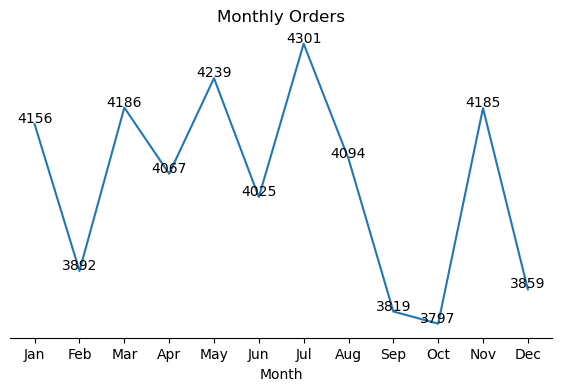

In [55]:
# plot a line chart of the monthly orders
fig, ax = plt.subplots(figsize=[7,4])
ax.plot(monthly_order['month_name'].str[0:3], monthly_order['total_orders'])
ax.set_title('Monthly Orders')
ax.yaxis.set_visible(False)
ax.set_xlabel('Month')
ax.spines[['top', 'right', 'left']].set_visible(False)
for index, value in enumerate(monthly_order['total_orders'].values):
    ax.annotate(value, xy=(index, value+10), ha='center', va='center')
plt.show()

- The line chart shows a trend in the monthly orders with the month of July having the highest orders(4301) and october having the least order (3797)

## %MoM Change in Order

In [56]:
#create a for loop to get current month orders and append it as last month orders
last_mth_orders = [np.nan]
num_range = np.arange(0, 11, 1)
for i in num_range:
    x = monthly_order['total_orders'].iloc[i]
    last_mth_orders.append(x)

monthly_order['last_month_orders'] = last_mth_orders
monthly_order

,month,month_name,total_orders,last_month_orders
0,1,January,4156,NaN
1,2,February,3892,4156.0
2,3,March,4186,3892.0
3,4,April,4067,4186.0
4,5,May,4239,4067.0
5,6,June,4025,4239.0
6,7,July,4301,4025.0
7,8,August,4094,4301.0
8,9,September,3819,4094.0
9,10,October,3797,3819.0


In [57]:
#create a MoM order column
monthly_order['MoM_order'] = ((monthly_order['total_orders'] - monthly_order['last_month_orders']) 
                                / monthly_order['last_month_orders'])

In [58]:
#create a %MoM order column
monthly_order['%MoM_order']= (monthly_order['MoM_order'] * 100).round(1)

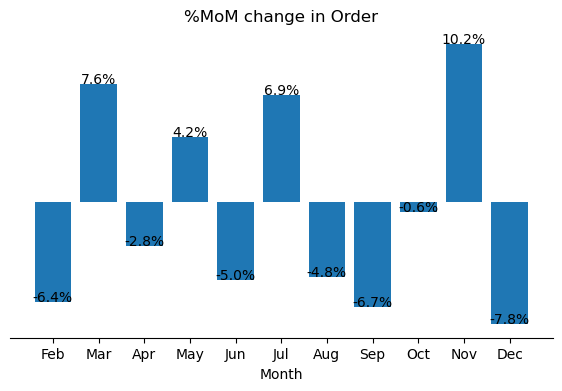

In [59]:
#plotting a bar chart of %MoM change in orders

fig, ax = plt.subplots(figsize=[7,4])
ax.bar(x=monthly_order['month_name'].str[0:3], height=monthly_order['%MoM_order'])
ax.set_title('%MoM change in Order')
ax.set_xlabel('Month')
for index, value in enumerate(monthly_order['%MoM_order'].values):
    ax.annotate(str(value)+'%', xy=(index, value+0.3), ha='center', va='center')
ax.yaxis.set_visible(False)
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.show()

- The bar chart shows a % month over month change in orders. There is a 10% rise in order in November compare to previous month octonber, showing increase in orders in November

## Orders by Category

In [60]:
# calculating the total order by Pizza category
cat_order = (merged_data.groupby(['category'], as_index=False)
                        .agg(total_orders = ('order_id', 'count'))
                        .sort_values('total_orders', ascending=False))
cat_order

,category,total_orders
1,Classic,14579
2,Supreme,11777
3,Veggie,11449
0,Chicken,10815


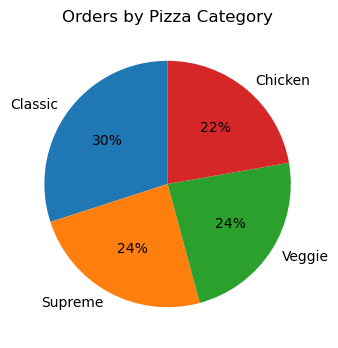

In [61]:
# Plotting a pie chart of the total orders by pizza category

fig, ax = plt.subplots(figsize=[5,4])
ax.pie(cat_order['total_orders'], labels=cat_order['category'], startangle=90, autopct='%.0f%%')
ax.set_title('Orders by Pizza Category')
plt.show()

- The pie chart shows that the Classic Pizza category made up of 30% of the total orders, while supreme and veggie had about the same order percentage (24%), the chicken category has the least percentage order of 22%

## Top 10 Selling Pizza

In [62]:
# Calculating the top 10 selling pizza
top_10_sold = (merged_data.groupby(['name']).agg(total_qty=('quantity', 'sum'))
                        .sort_values('total_qty', ascending=False)
                        .head(10).reset_index())

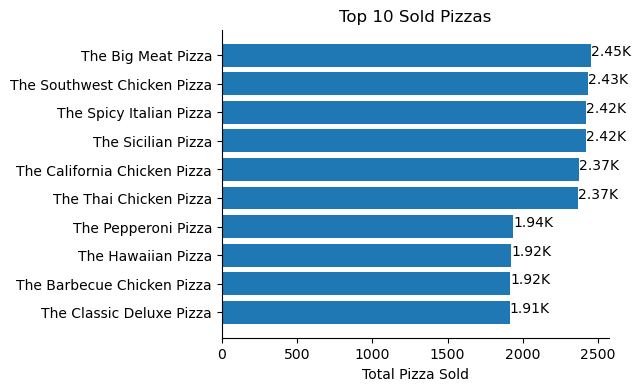

In [63]:
# Creating a barchart of the top ten sold pizza

fig, ax = plt.subplots(figsize=[5,4])
ax.barh(y=top_10_sold['name'], width=top_10_sold['total_qty'].sort_values(ascending=True))
ax.set_title('Top 10 Sold Pizzas')
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('Total Pizza Sold')
for index, value in enumerate(top_10_sold['total_qty'].sort_values(ascending=True).values):
    ax.text(value, index, str((value/1000).round(2))+'K')
plt.show()

- The bar chart shows the top ten most sold pizza. The **Big meat Pizza** rank first, followed by The **Southwest Chicken Pizza** and **Spicy Italian Pizza** ranking third.

## Lowest Selling Pizza

In [64]:
# Calculating the lowest selling pizza
least_5_sold = (merged_data.groupby(['name']).agg(total_qty=('quantity', 'sum'))
                                    .sort_values('total_qty', ascending=True)
                                    .head(5).reset_index())


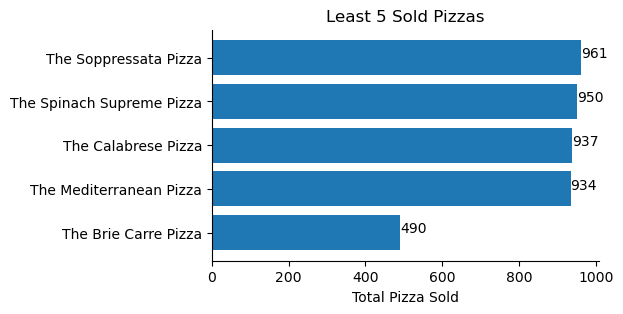

In [65]:
# Creating a barchart of the least five sold pizza

fig, ax = plt.subplots(figsize=[5,3])
ax.barh(y=least_5_sold['name'], width=least_5_sold['total_qty'])
ax.set_title('Least 5 Sold Pizzas')
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('Total Pizza Sold')
for index, value in enumerate(least_5_sold['total_qty'].sort_values(ascending=True).values):
    ax.text(value, index, str(value))
plt.show()

- The bar chart shows the five least sold pizza, with The Brie Carre Pizza ranking the lowest with about 490 pizzas sold

## Order by day of week

In [66]:
#create a day of week column

merged_data['day_of_week'] = merged_data['date'].dt.day_of_week
merged_data['day_name'] = merged_data['date'].dt.day_name()

# Create an order by day of week dataframe
day_order = (merged_data.groupby(['day_of_week','day_name'], as_index=False)
                 .agg(total_orders = ('order_id', 'count'))
                 .sort_values('day_of_week', ascending=True))

In [67]:
# Create a %order column to the day of week dataframe
day_order['%order'] = ((day_order['total_orders']/total_orders)*100).round(2)

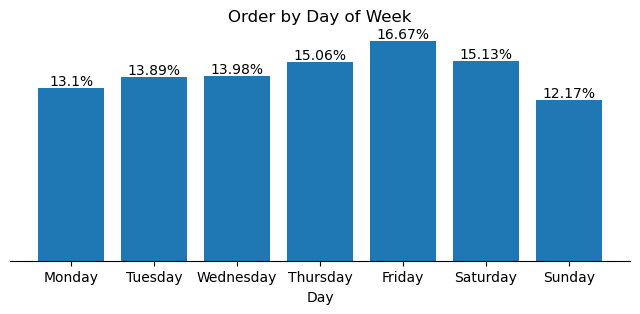

In [68]:
#Plotting a bar chart of the order by day of week

fig, ax = plt.subplots(figsize=[8,3])

ax.bar(x=day_order['day_name'], height=day_order['%order'])

ax.set_title('Order by Day of Week')
ax.set_xlabel('Day')
ax.set_ylabel('% Order')
for index, value in enumerate(day_order['%order'].values):
    ax.annotate(str(value)+'%', xy=(index, value+0.5), ha='center', va='center')
ax.yaxis.set_visible(False)
ax.spines[['top', 'right', 'left']].set_visible(False)

plt.show()

- Then bar chart shows that Friday is the most favorite day that customers ordered a pizza and it accounts for 16.67% of the total orders, this is followed by Saturday (15.13%) and Thursday (15.06%). 

# Revenue Analysis

## Monthly Revenue

In [69]:
#calculating the monthly revenue
monthly_revenue = (merged_data.groupby(['month' ,'month_name'], as_index=False)
                    .agg(revenue=('revenue', 'sum')).sort_values('month'))

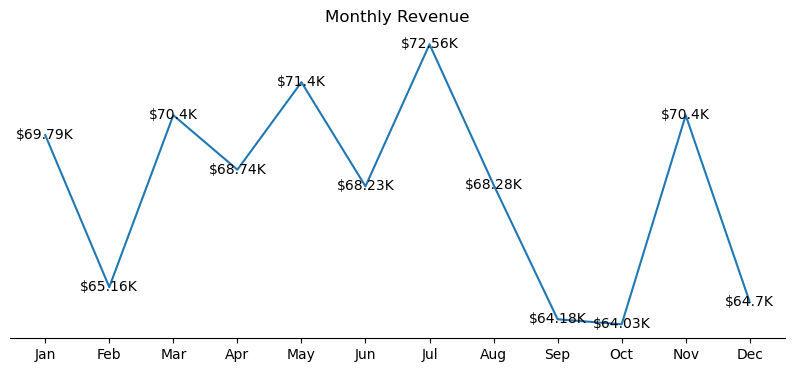

In [70]:
#plotting a line chart of monthly revenue trend

fig, ax = plt.subplots(figsize=[10,4])
ax.plot(monthly_revenue['month_name'].str[0:3], monthly_revenue['revenue'])
ax.set_title('Monthly Revenue')
ax.yaxis.set_visible(False)
ax.spines[['top', 'right', 'left']].set_visible(False)
for index, value in enumerate(monthly_revenue['revenue'].values):
    ax.annotate('$'+str((value/1000).round(2))+'K', xy=(index, value), ha='center', va='center')
plt.show()

- The line chart shows the monthly revenue from the pizza sales, and July had the highest revenue ($72,557.90) due to the fact that it had the highest order

## Revenue by Pizza category

In [71]:
# Calculating the revenue by Pizza category dataframe
rev_by_category = (merged_data.groupby(['category'], as_index=False)
                    .agg(total_revenue=('revenue', 'sum'))
                    .sort_values('total_revenue', ascending=False))

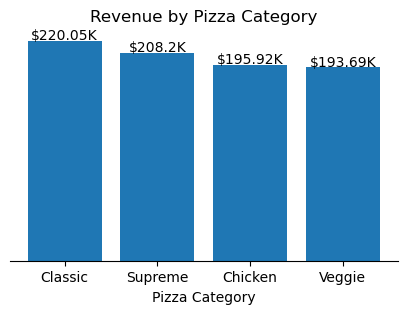

In [72]:
# Plotting a barchart of the revenue by category
fig, ax = plt.subplots(figsize=[5,3])
ax.bar(data=rev_by_category, x='category', height='total_revenue')

ax.set_title('Revenue by Pizza Category')
ax.set_xlabel('Pizza Category')
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.yaxis.set_visible(False)

for index, value in enumerate(rev_by_category['total_revenue'].values):
    ax.annotate('$'+str((value/1000).round(2))+'K', xy=(index, value+5000), va='center', ha='center')

plt.show()

- The bar chart shows the revenue by pizza category, and the Classic category generated the highest revenue

## Top five pizza by revenue

In [73]:
# creating a Top five pizza by revenue dataframe
rev_by_pizza = (merged_data.groupby(['name'])
                    .agg(total_revenue=('revenue', 'sum'))
                    .sort_values('total_revenue', ascending=False)
                    .head(5).reset_index())

rev_by_pizza1 = rev_by_pizza.sort_values('total_revenue', ascending=True)


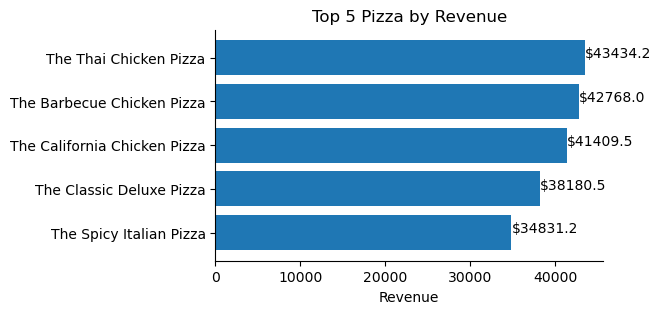

In [74]:
# Plotting a barchart of the revenue by category
fig, ax = plt.subplots(figsize=[5,3])
ax.barh(y=rev_by_pizza1['name'], width=rev_by_pizza1['total_revenue'])

ax.set_title('Top 5 Pizza by Revenue')
ax.set_xlabel('Revenue')
ax.spines[['top', 'right']].set_visible(False)

for index, value in enumerate(rev_by_pizza1['total_revenue'].sort_values(ascending=True).values):
    ax.text(value, index, '$'+str(value.round(1)))

plt.show()

- The bar chart shows the top five pizzas that generated the highest revenue and The Thai Chicken Pizza rank top with a total revenue of $43,434.25

## Least five pizza by revenue

In [75]:
# creating a Least five pizza by revenue dataframe
rev_by_pizza2 = (merged_data.groupby(['name'])
                    .agg(total_revenue=('revenue', 'sum'))
                    .sort_values('total_revenue', ascending=True)
                    .head(5).reset_index())

rev_by_pizza2 = rev_by_pizza2.sort_values('total_revenue', ascending=False)

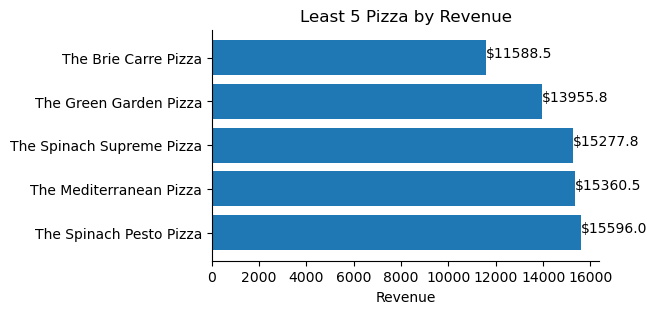

In [76]:
# Plotting a barchart of the revenue by category
fig, ax = plt.subplots(figsize=[5,3])
ax.barh(y=rev_by_pizza2['name'], width=rev_by_pizza2['total_revenue'])

ax.set_title('Least 5 Pizza by Revenue')
ax.set_xlabel('Revenue')
ax.spines[['top', 'right']].set_visible(False)

for index, value in enumerate(rev_by_pizza2['total_revenue'].sort_values(ascending=False).values):
    ax.text(value, index, '$'+str(value.round(1)))

plt.show()

- The bar chart shows five pizzas that generated the lowest revenue and The Brie Carre Pizza rank lowest with a total revenue of $11,588.5

# Summary of findings
The Mac-D Pizza Store makes about 32 pizza types of different sizes belonging to four categories. The store had a total of 21,350 unique customers with an average of 60 customers per day
A total of 48,620 orders was placed with an average of 136 orders daily. The total pizza sold for the year was 49,574 pizza with an average of 138 pizza per day. An average of 1 pizza is sold per order.

### Order Analysis

#### Order Volume
- The most ordered pizza category is the classic with a total order of 14,579, and the most ordered pizza is the Classic deluxe Pizza. The least ordered pizza is the Brie Carre pizza with a total of 480 orders.

#### Order day
- Friday is the most favorite day that customers ordered a pizza and it accounts for 16.67% of the total orders, this is followed by Saturday (15.13%) and Thursday (15.08%). 
- The least favorite day is Sunday which had 12.17% of the total order. This might be because people are home on Sunday and they may prefer a home cooked meal.

#### Order hour
- There are four peak hours, each account for more than 10% of the orders. The hour, 12pm ranked top with 13.46% of the total order, 1pm with 12.76%, 6pm with 11.02% and 5pm with 10.58% of the total order. 
- The first two peak hours (12pm and 1pm) had more than 1000 orders placed between Monday and Friday, and more than 600 orders placed at 6pm and 5pm a  nd as such, the business should ensure staffs are sufficient during those hours to take orders and enough pizzas are available to meet demands.

### Revenue Analysis
- A total of 817,860 was generated as revenue from sales with the classic pizza category ranking top with a total of 220,053. 
- The Thai chicken pizza from the chicken category had the highest revenue (43,434) while the Brie Carre Pizza had the lowest revenue (11,588) 
- The month of July had the highest revenue of 72,558, followed by May (71,403) 
